In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
def make_df(path):
    with open(path) as f:
        cropped_text= f.read()

    main_arr1=[]
    for val in cropped_text.split("\n"):
        if(val==''):
            continue
        dict={}
        dict['file']=val.split(',')[0].strip()
        dict['object']= val.split(',')[1].strip()
        dict['num']= float(val.split(',')[2])
        main_arr1.append(dict)
    df= pd.DataFrame(main_arr1)
    return df

In [32]:
# cropped_df= make_df("./cropped_4356.txt")
original_df=make_df("../commons/original_labels.txt")

In [33]:
len(original_df['object'].unique())

80

In [34]:
df_temp= pd.read_pickle("../commons/caption_description.pkl")

In [35]:
df_labels= df_temp.drop(["text", "description", "sets"], axis=1)
temporary= original_df.merge(df_labels, on="file", how="left")
offensive_df= temporary[temporary["label"]==1]
non_offensive_df= temporary[temporary["label"]==0]

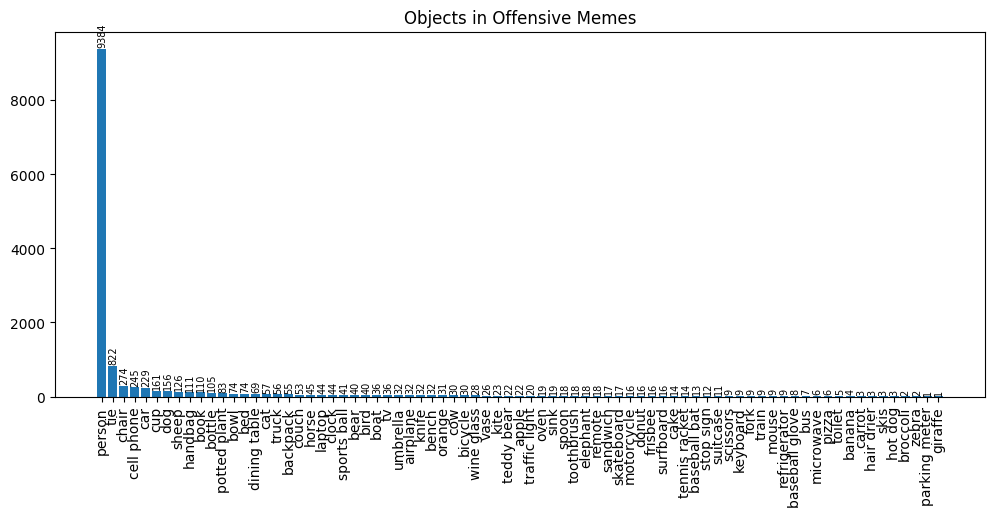

In [36]:
df_o= offensive_df['object'].value_counts()
categories_o= df_o.index.to_list()

fig, axis= plt.subplots(figsize=(12, 5))
bars= axis.bar(categories_o, df_o)

for bar in bars:
    y=(bar.get_height())
    x= bar.get_xy()[0]
    plt.annotate(text= bar.get_height(), xy=(x,y+100), size=7, rotation=90)
plt.xticks(rotation=90)
plt.subplots_adjust(top=0.84)
plt.title("Objects in Offensive Memes")
plt.show()

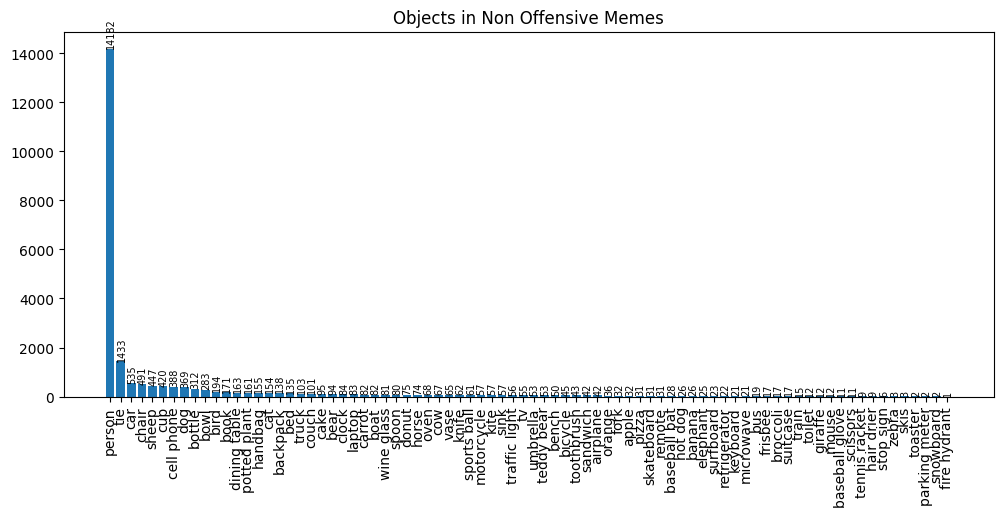

In [37]:
df_n= non_offensive_df['object'].value_counts()
categories_n= df_n.index.to_list()

fig, axis= plt.subplots(figsize=(12, 5))
bars= axis.bar(categories_n, df_n)

for bar in bars:
    y=(bar.get_height())
    x= bar.get_xy()[0]
    plt.annotate(text= bar.get_height(), xy=(x,y+100), size=7, rotation=90)
plt.xticks(rotation=90)
plt.subplots_adjust(top=0.84)
plt.title("Objects in Non Offensive Memes")
plt.show()

In [38]:
df2= original_df['object'].value_counts()
categories= df2.index.to_list()

In [39]:
original_df

,file,object,num
0,01235.png,person,0.999
1,01236.png,person,0.990
2,01236.png,person,0.957
3,01236.png,sheep,0.952
4,01236.png,sheep,0.978
...,...,...,...
35968,98754.png,person,0.977
35969,98756.png,person,0.999
35970,98762.png,dog,0.994
35971,98762.png,person,0.997


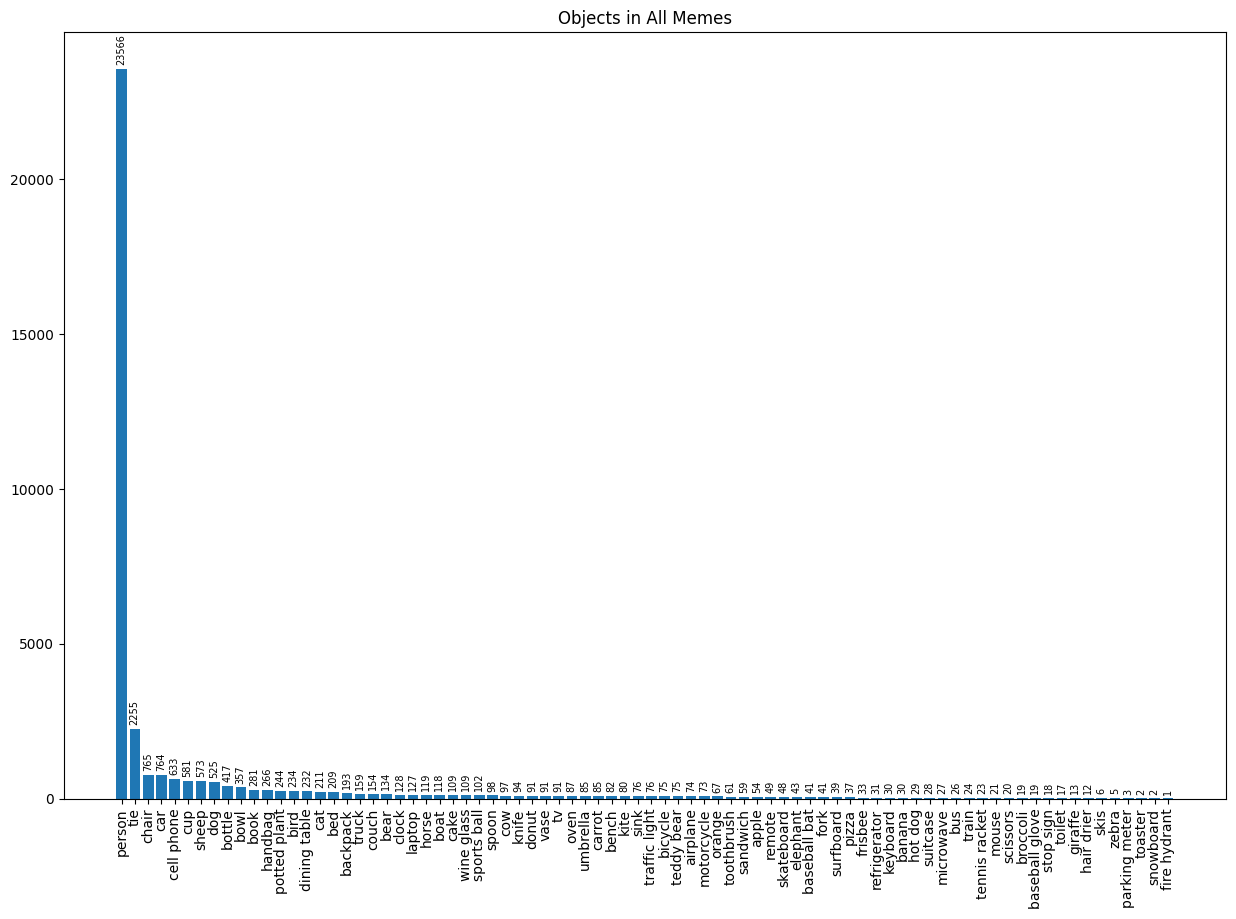

In [40]:
fig, axis= plt.subplots(figsize=(15, 10.5))
bars= axis.bar(categories, df2)

for bar in bars:
    y=(bar.get_height())
    x= bar.get_xy()[0]
    plt.annotate(text= bar.get_height(), xy=(x,y+200), size=7, rotation=90)
plt.xticks(rotation=90)
plt.subplots_adjust(top=0.84)
plt.title("Objects in All Memes")
plt.show()

It is important to note that human beings on images alone do not show anything significant, because they occur in an overwhelming majority of images. We will also need to consider additonal information about the humans detected, including race, emotion and gender as memes, particularly offensive ones tend to have some racial or sexist themes. Emotion will help in analysing the expression of the pertaining individuals. Using the deepface library, a catalog of race-emotion-gender was made on the images where people were detected by the detr-resnet-50 model. 

In [41]:
with open("../commons/race_file2.txt") as f:
    text= f.read()
mainarr=[]
for val in text.split("\n"):
    if(val==""):
        continue
    dictv={}
    dictv["file"]=val.split(", ")[0].strip()
    dictv["sex"]=val.split(", ")[1].strip()
    dictv["race"]=val.split(", ")[2].strip()
    dictv["emotion"]=val.split(", ")[3].strip()
    mainarr.append(dictv)

In [42]:
race_df= pd.DataFrame(mainarr)
race_df

,file,sex,race,emotion
0,06931.png,Man,white,angry
1,06931.png,Man,white,fear
2,06931.png,Woman,asian,angry
3,06931.png,Woman,latino hispanic,disgust
4,06931.png,Man,white,fear
...,...,...,...,...
22399,41605.png,Man,white,neutral
22400,41562.png,Woman,asian,neutral
22401,41506.png,Man,asian,neutral
22402,41389.png,Man,white,happy


In [43]:
def plot_pie_chart(series, title_str):
    labels = series.index
    sizes = series.values

    plt.figure(figsize=(3, 3))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')  
    plt.title(title_str)
    plt.show()

In [44]:
#These are the results for all memes- offensive or not
print(race_df["sex"].value_counts())
print("\n")
print(race_df["race"].value_counts())
print("\n")
print(race_df["emotion"].value_counts())

sex
Man      17841
Woman     4563
Name: count, dtype: int64


race
white              12076
asian               3941
black               2617
middle eastern      2019
latino hispanic     1283
indian               468
Name: count, dtype: int64


emotion
sad         5784
happy       5485
neutral     5285
fear        3186
angry       2214
surprise     416
disgust       34
Name: count, dtype: int64


In [45]:
#the caption description dataframe built earlier has labels for offensiveness
#easier to reuse that information
df_temp2= df_temp.drop(["text", "description", "sets"], axis=1)
df_temp2

,label,file
0,0,71094.png
1,0,91724.png
2,0,64280.png
3,0,67082.png
4,0,46380.png
...,...,...
12135,1,59482.png
12136,1,21693.png
12137,1,59837.png
12138,1,42897.png


In [46]:
# truths= ["train" in val for val in df_temp2["sets"]]
# df_temp2[truths]
original_df.drop(["num"], axis=1)

,file,object
0,01235.png,person
1,01236.png,person
2,01236.png,person
3,01236.png,sheep
4,01236.png,sheep
...,...,...
35968,98754.png,person
35969,98756.png,person
35970,98762.png,dog
35971,98762.png,person


In [47]:
analysis_df1= race_df.merge(df_temp2)

In [48]:
non_offensive_df= analysis_df1[analysis_df1["label"]==0]
print(non_offensive_df["sex"].value_counts())
print("\n")
print(non_offensive_df["race"].value_counts())
print("\n")
print(non_offensive_df["emotion"].value_counts())

sex
Man      10482
Woman     2836
Name: count, dtype: int64


race
white              7287
asian              2402
black              1445
middle eastern     1153
latino hispanic     793
indian              238
Name: count, dtype: int64


emotion
happy       3355
sad         3340
neutral     3099
fear        1900
angry       1353
surprise     254
disgust       17
Name: count, dtype: int64


In [49]:
offensive_df= analysis_df1[analysis_df1["label"]==1]
print(offensive_df["sex"].value_counts())
print("\n")
print(offensive_df["race"].value_counts())
print("\n")
print(offensive_df["emotion"].value_counts())

sex
Man      7359
Woman    1727
Name: count, dtype: int64


race
white              4789
asian              1539
black              1172
middle eastern      866
latino hispanic     490
indian              230
Name: count, dtype: int64


emotion
sad         2444
neutral     2186
happy       2130
fear        1286
angry        861
surprise     162
disgust       17
Name: count, dtype: int64


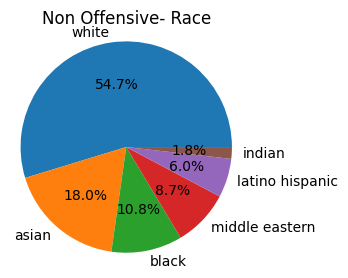

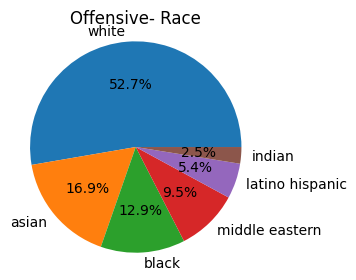

In [50]:
#We can visualise the distributions better with pie charts here
plot_pie_chart(non_offensive_df["race"].value_counts(), "Non Offensive- Race")
plot_pie_chart(offensive_df["race"].value_counts(), "Offensive- Race")

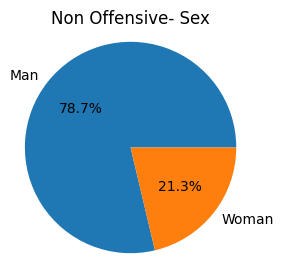

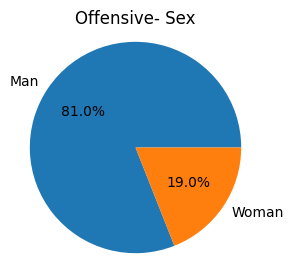

In [51]:
plot_pie_chart(non_offensive_df["sex"].value_counts(), "Non Offensive- Sex")
plot_pie_chart(offensive_df["sex"].value_counts(), "Offensive- Sex")

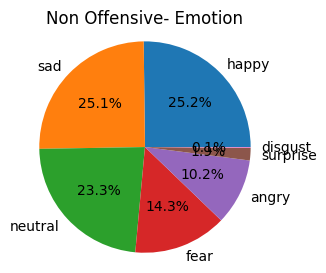

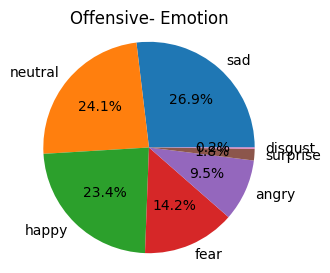

In [52]:
plot_pie_chart(non_offensive_df["emotion"].value_counts(), "Non Offensive- Emotion")
plot_pie_chart(offensive_df["emotion"].value_counts(), "Offensive- Emotion")

We can clearly see, the distribution is almost identical in non offensive and offensive memes, yet we observe that offensive memes ever so slightly feature more balck and middle eastern, men, and sad emotion. We will also explore how they occur together, basically co-occurence among the classes for further detail. 

In [53]:
td= original_df.drop(["num"], axis=1)
ohe=pd.get_dummies(td["object"])
td2= pd.concat((td.drop(["object"], axis=1), ohe), axis=1)
dictv={}
for col in ohe.columns:
    dictv[col]="sum"
td3= td2.groupby("file").agg(dictv).reset_index()

In [54]:
cols= ["sex", "race", "emotion"]
ohe2= pd.get_dummies(race_df[cols])
temp= pd.concat((race_df.drop(cols, axis=1), ohe2), axis=1)
dictv2= {}
for col2 in ohe2.columns:
    dictv2[col2]="sum"
temp2= temp.groupby("file").agg(dictv2).reset_index()

This is the final catalog of all the objects detected containing information of the objects detected and the races, sex and emotions. We will now build a model to see co-occurence of all the items, in order to predict whether certain objects occuring together are likely to make a meme offensive or not

In [55]:
catalog= td3.merge(temp2, how="outer").fillna(0)
df_train= (pd.read_pickle("../commons/caption_description.pkl")).drop(["text", "description"], axis=1)
df_final= df_train.merge(catalog, on="file", how="outer").fillna(0)

In [56]:
import pickle
with open("./catalog.pkl", "wb") as f:
    pickle.dump(df_final, f)

In [57]:
train_vals= ["train" in val for val in df_final["sets"]]
X_train, y_train= df_final[train_vals].drop(["file", "sets", "label"], axis=1), df_final[train_vals]["label"]

In [58]:
def metrics_calc(model_v, title, X_test, y_test, model):
    y_pred = model.predict(X_test)
    y_pred = (y_pred >= 0.5).astype(int)
    tempdict={}
    tempdict["model"]=model_v
    tempdict["dataset"]= title
    tempdict["accuracy score"]= metrics.accuracy_score(y_test, y_pred)
    tempdict["roc-auc score"] = metrics.roc_auc_score(y_test, y_pred)
    tempdict["f1 score"] = metrics.f1_score(y_test, y_pred)
    tempdict["precision score"] = metrics.precision_score(y_test, y_pred)
    tempdict["recall score"] = metrics.recall_score(y_test, y_pred)
    return tempdict

We will now perform dimensionality reduction to assess the impact of reduction in dimension. We will notice that even with a lot less features, the recall is as terrible as it was earlier, indicating that the problem may not be solvable with dimensionality reduction. It is also important to note that accuracy may not be a good measure in this case 

In [59]:
scaling=StandardScaler()
 
# Use fit and transform method 
scaling.fit(X_train)
Scaled_data=scaling.transform(X_train)
 
# Set the n_components=3
principal=PCA()
principal.fit(Scaled_data)

PCA()

In [60]:
#as we can see, that the distribution among the principal classes is fairly uniform and no single component accounts for a 
#large majority of the variance, hence PCA seems unsuitable for dimensionality reduction
principal.explained_variance_ratio_

array([7.50868795e-02, 2.42121114e-02, 1.91286770e-02, 1.64172886e-02,
       1.57059412e-02, 1.51515176e-02, 1.45184558e-02, 1.41536305e-02,
       1.39855912e-02, 1.31303135e-02, 1.30079374e-02, 1.26800066e-02,
       1.24472201e-02, 1.23727481e-02, 1.21642501e-02, 1.20495608e-02,
       1.20181239e-02, 1.18339126e-02, 1.15931862e-02, 1.14092828e-02,
       1.13917581e-02, 1.12713566e-02, 1.11889129e-02, 1.10826700e-02,
       1.09645006e-02, 1.09576629e-02, 1.08893741e-02, 1.08392994e-02,
       1.07460613e-02, 1.07408885e-02, 1.07205330e-02, 1.06689957e-02,
       1.06335476e-02, 1.06300976e-02, 1.06114322e-02, 1.05925917e-02,
       1.05613050e-02, 1.05587335e-02, 1.05451836e-02, 1.05400377e-02,
       1.05352280e-02, 1.05330455e-02, 1.05298138e-02, 1.05264806e-02,
       1.05098422e-02, 1.04795751e-02, 1.04629484e-02, 1.04081499e-02,
       1.03723613e-02, 1.03094284e-02, 1.02761347e-02, 1.02534426e-02,
       1.02056706e-02, 1.01545434e-02, 1.00574601e-02, 1.00151558e-02,
      

In [61]:
#categories are based on super-classes defined in cocos website itself, person is a separate category due to its significance in out purpose
df_final2= df_final.copy()

df_final2["accessory"] = (
    df_final2["umbrella"]
    + df_final2["tie"]
    + df_final2["suitcase"]
    + df_final2["handbag"]
    + df_final2["backpack"]
)

df_final2["animals"]= (
    df_final2["bird"]+
    df_final2["cat"]+
    df_final2["dog"]+
    df_final2["horse"]+
    df_final2["sheep"]+
    df_final2["cow"]+
    df_final2["elephant"]+
    df_final2["bear"]+
    df_final2["zebra"]+
    df_final2["giraffe"]
)

df_final2["appliance"] = (
    df_final2["toaster"]
    + df_final2["sink"]
    + df_final2["refrigerator"]
    + df_final2["oven"]
    + df_final2["microwave"]
)

df_final2["electronics"]= (
    df_final2["tv"]+
    df_final2["remote"]+
    df_final2["laptop"]+
    df_final2["keyboard"]+
    df_final2["cell phone"]+
    df_final2["mouse"]
)

df_final2["food"] = (
    df_final2["apple"]
    + df_final2["banana"]
    + df_final2["orange"]
    + df_final2["broccoli"]
    + df_final2["carrot"]
    + df_final2["hot dog"]
    + df_final2["sandwich"]
    + df_final2["pizza"]
    + df_final2["donut"]
    + df_final2["cake"]
)

df_final2["furniture"]=(
    df_final2["potted plant"]+
    df_final2["dining table"]+
    df_final2["couch"]+
    df_final2["chair"]+
    df_final2["bed"]
)

df_final2["indoor"] = (
    df_final2["vase"]
    + df_final2["toothbrush"]
    + df_final2["teddy bear"]
    + df_final2["scissors"]
    + df_final2["hair drier"]
    + df_final2["clock"]
    + df_final2["book"]
    +df_final2["toilet"]
)

df_final2["kitchen"] = (
    df_final2["bowl"]
    + df_final2["spoon"]
    + df_final2["fork"]
    + df_final2["knife"]
    + df_final2["wine glass"]
    + df_final2["cup"]
    + df_final2["bottle"]
)


df_final2["outdoor"] = (
    df_final2["traffic light"]
    + df_final2["stop sign"]
    + df_final2["parking meter"]
    + df_final2["fire hydrant"]
    + df_final2["bench"]
)

df_final2["sports"] = (
    df_final2["sports ball"]
    + df_final2["frisbee"]
    + df_final2["skis"]
    + df_final2["snowboard"]
    + df_final2["sports ball"]
    + df_final2["kite"]
    + df_final2["baseball bat"]
    + df_final2["baseball glove"]
    + df_final2["skateboard"]
    + df_final2["surfboard"]
    + df_final2["tennis racket"]
)

df_final2["vehicles"] = (
    df_final2["truck"]
    + df_final2["train"]
    + df_final2["motorcycle"]
    + df_final2["car"]
    + df_final2["bus"]
    + df_final2["boat"]
    + df_final2["bicycle"]
    + df_final2["airplane"]
)


In [62]:
drop_ls=['airplane', 'apple', 'backpack', 'banana',
    'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle',
    'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake',
    'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'couch', 'cow',
    'cup', 'dining table', 'dog', 'donut', 'elephant', 'fire hydrant',
    'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse',
    'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave',
    'motorcycle', 'mouse', 'orange', 'oven', 'parking meter',
    'pizza', 'potted plant', 'refrigerator', 'remote', 'sandwich',
    'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'spoon',
    'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear',
    'tennis racket', 'tie', 'toaster', 'toilet', 'toothbrush',
    'traffic light', 'train', 'truck', 'tv', 'umbrella', 'vase',
    'wine glass', 'zebra']
df_final3= df_final2.drop(drop_ls, axis=1)

In [63]:
df_final3

,label,file,sets,person,sex_Man,sex_Woman,race_asian,race_black,race_indian,race_latino hispanic,...,animals,appliance,electronics,food,furniture,indoor,kitchen,outdoor,sports,vehicles
0,1,01235.png,[train],1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,01236.png,[train],6.0,5.0,0.0,1.0,0.0,0.0,1.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,01243.png,[train],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,01245.png,[train],1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,01247.png,[train],1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12135,0,98752.png,[train],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12136,1,98754.png,[train],1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12137,1,98756.png,[train],1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12138,0,98762.png,[train],1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
with open("./catalog_reduced.pkl", "wb") as f:
    pickle.dump(df_final3, f)

## Conclusion:

1. Object detection done using model detr-resnet-50 from Huggingface
2. Cataloged objects detected, found that person label disproportionately appears the most
3. Analysed race, emotion, gender of the people detected
4. Distribution of above classes similar in offensive and non-offensive sets. However, slightly more black and middle eastern, more men, more sad emotions detected in offensive memes
5. Final catalog contains both objects and the races. Yet in some images, no objects were detected at all giving all zero rows
6. Performed feature engineering and dimensionality reduction by clubbing the objects detected into classes (reference the original coco dataset) and retrained models. Similar scenario- high precision, low recall